In [2]:
import numpy as np
import torch.nn as nn
from geneticalgorithm2 import geneticalgorithm2 as ga # for creating and running optimization model

from geneticalgorithm2 import Generation, AlgorithmParams # classes for comfortable parameters setting and getting

from geneticalgorithm2 import Crossover, Mutations, Selection # classes for specific mutation and crossover behavior

from geneticalgorithm2 import Population_initializer # for creating better start population

from geneticalgorithm2 import np_lru_cache # for cache function (if u want)

from geneticalgorithm2 import plot_pop_scores # for plotting population scores, if u want

from geneticalgorithm2 import Callbacks # simple callbacks (will be deprecated)

from geneticalgorithm2 import Actions, ActionConditions, MiddleCallbacks # middle callbacks
from sklearn.ensemble import RandomForestRegressor
from torch.autograd import Variable
import torch

In [7]:
class GA:
    def __init__(self, FOLDER) -> None:
        self.DATA_PATH = '../../../data/10FEMTO/processed_data/'
        self.FOLDER = FOLDER
        self.X = np.load(f'{self.DATA_PATH}/{FOLDER}/{FOLDER}_train_X.npy')[:, 0, :]
        self.Y = np.load(f'{self.DATA_PATH}/{FOLDER}/{FOLDER}_train_Y.npy')
        self.X_test = np.load(f'{self.DATA_PATH}/Bearing1_3/Bearing1_3_test_X.npy')[:, 0, :]
        self.Y_test = np.load(f'{self.DATA_PATH}/Bearing1_3/Bearing1_3_test_Y.npy')
        self.LABEL = ['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','y']
        self.FEATURE_THRESHOLD = 0.8
        
    def evaluate_model(self, features):
        selected_features = [i for i in range(len(features)) if features[i] >= 0.5]
        X_train = self.X[:, selected_features]
        X_test = self.X_test[:, selected_features]        
        rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
        rf_model.fit(X_train, self.Y)
        y_pred = rf_model.predict(X_test)
        criterion = nn.MSELoss()
        Y_test = np.reshape(self.Y_test, (len(self.Y_test), -1))
        y_pred = np.reshape(y_pred, (len(y_pred), -1))
        Y_test = Variable(torch.Tensor(Y_test).float())
        y_pred = Variable(torch.Tensor(y_pred).float())
        # Use Mean Squared Error as the objective function to minimize
        mse = criterion(Y_test, y_pred)
        return mse
    
    def ga_function(self,):
        varbound = np.array([[0, 1]] * 16)

        model = ga(function=self.evaluate_model, dimension=16, variable_type='real', variable_boundaries=varbound, algorithm_parameters=AlgorithmParams(
                    max_num_iteration = 2,
                    population_size = 100,
                    mutation_probability = 0.1,
                    mutation_discrete_probability = None,
                    elit_ratio = 0.01,
                    parents_portion = 0.3,
                    crossover_type = 'uniform',
                    mutation_type = 'uniform_by_center',
                    mutation_discrete_type = 'uniform_discrete',
                    selection_type = 'roulette',
                    max_iteration_without_improv = None
                    ))
        result = model.run()
        # best solution
        print(result.variable)
        selected_features = [i + 1 for i in range(16) if result.variable[i] >= 0.5]
        print(selected_features)
        # best score
        print(result.score)

        # last population
        print(result.last_generation)
        
    def main(self):
        self.ga_function()

In [8]:
g = GA('Bearing1_1')
g.main()

[0, 2, 3, 4, 8, 9, 11]
(2763, 7) (2335, 7)
[3, 7, 11, 13]
(2763, 4) (2335, 4)
[0, 1, 4, 5, 10, 12, 14, 15]
(2763, 8) (2335, 8)


KeyboardInterrupt: 

In [7]:
for i in [1]:
    g = GA(f'Bearing1_{i}')
    feat_dict = g.X
    print(feat_dict.shape)
    print(g.Y.shape)

(2763, 16)
(2763,)



Set: Average time of function evaluating (secs): 1.5020370483398438e-05 (total = 0.00015020370483398438)

Best score before optimization: 5.244717394652298
                                                                                                                                                                                                        
 The best found solution:
 [2.85458645 0.20219107 1.46008182]

 Objective function:
 4.516859339318541

 Used generations: 10
 Used time: 0.00657 seconds


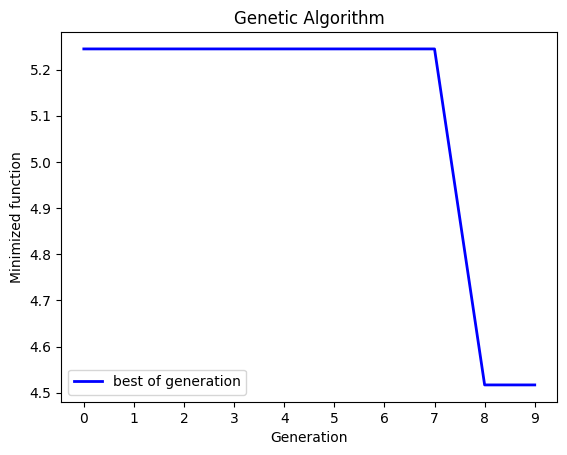

[2.85458645 0.20219107 1.46008182]
4.516859339318541
Generation(variables=array([[2.85458645, 0.20219107, 1.46008182],
       [2.85458645, 0.20219107, 1.46008182],
       [2.85458645, 0.20219107, 2.18793987],
       [2.85458645, 0.20219107, 2.18793987],
       [2.85458645, 0.20219107, 2.18793987],
       [2.85458645, 0.20219107, 2.73770471],
       [2.85458645, 0.20219107, 2.73770471],
       [2.85458645, 0.20219107, 2.73770471],
       [2.85458645, 4.04035543, 1.46008182],
       [2.85458645, 2.52259554, 9.9346951 ]]), scores=array([ 4.51685934,  4.51685934,  5.24471739,  5.24471739,  5.24471739,
        5.79448223,  5.79448223,  5.79448223,  8.35502369, 15.31187708]))


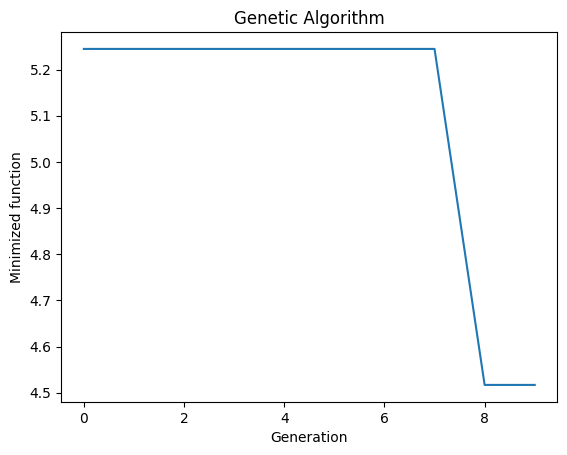

In [11]:
import numpy as np
from geneticalgorithm2 import geneticalgorithm2 as ga

def f(X):
    return np.sum(X)
    
    
varbound=[(0,10)]*3

algorithm_param = {'max_num_iteration': 10,
                   'population_size':10,
                   'mutation_probability': 0.1,
                   'mutation_discrete_probability': None,
                   'elit_ratio': 0.01,
                   'parents_portion': 0.3,
                   'crossover_type':'uniform',
                   'mutation_type': 'uniform_by_center',
                   'mutation_discrete_type': 'uniform_discrete',
                   'selection_type': 'roulette',
                   'max_iteration_without_improv':None}

model=ga(function=f,
            dimension=3,
            variable_type='real',
            variable_boundaries=varbound,
            algorithm_parameters=algorithm_param
            
        )

result = model.run(progress_bar_stream = None )
print(result.variable)
print(result.score)
print(result.last_generation)

import matplotlib.pyplot as plt
re = np.array(model.report)


plt.plot(re)
plt.xlabel('Generation')
plt.ylabel('Minimized function')
plt.title('Genetic Algorithm')
plt.savefig(f'../../../data/png/ga_generation.png', format='png', dpi=96)
plt.show()